<div align="center">

# 2023 Stack Overflow Developer Survey Analysis

**Jake Hahne**  
***CYBR 410 - Big Data Visualization (Spring 2024)***

**v1.0**

</div>

---

#### Introduction
This notebook acts as an exploratory analysis of the 2023 Stack Overflow Developer Survey.

#### Dataset Description
This analysis utilizes the rich data provided by the Stack Overflow's annual Developer Survey (2023).

# Prepping for Analysis
___

### Setup and Data Loading

In [6]:
# Install packages if needed
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Applying a style to the plot
plt.style.use('jake_style.mplstyle')

# Load the dataset into a pandas dataframe
df = pd.read_csv('data/raw/stack-overflow-developer-survey-2023/survey_results_public.csv', index_col="ResponseId")
schema_df = pd.read_csv('data/raw/stack-overflow-developer-survey-2023/survey_results_schema.csv')

df.columns

Index(['Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 

# Exploratory Analysis Through Visualization
___

## Programming Languages

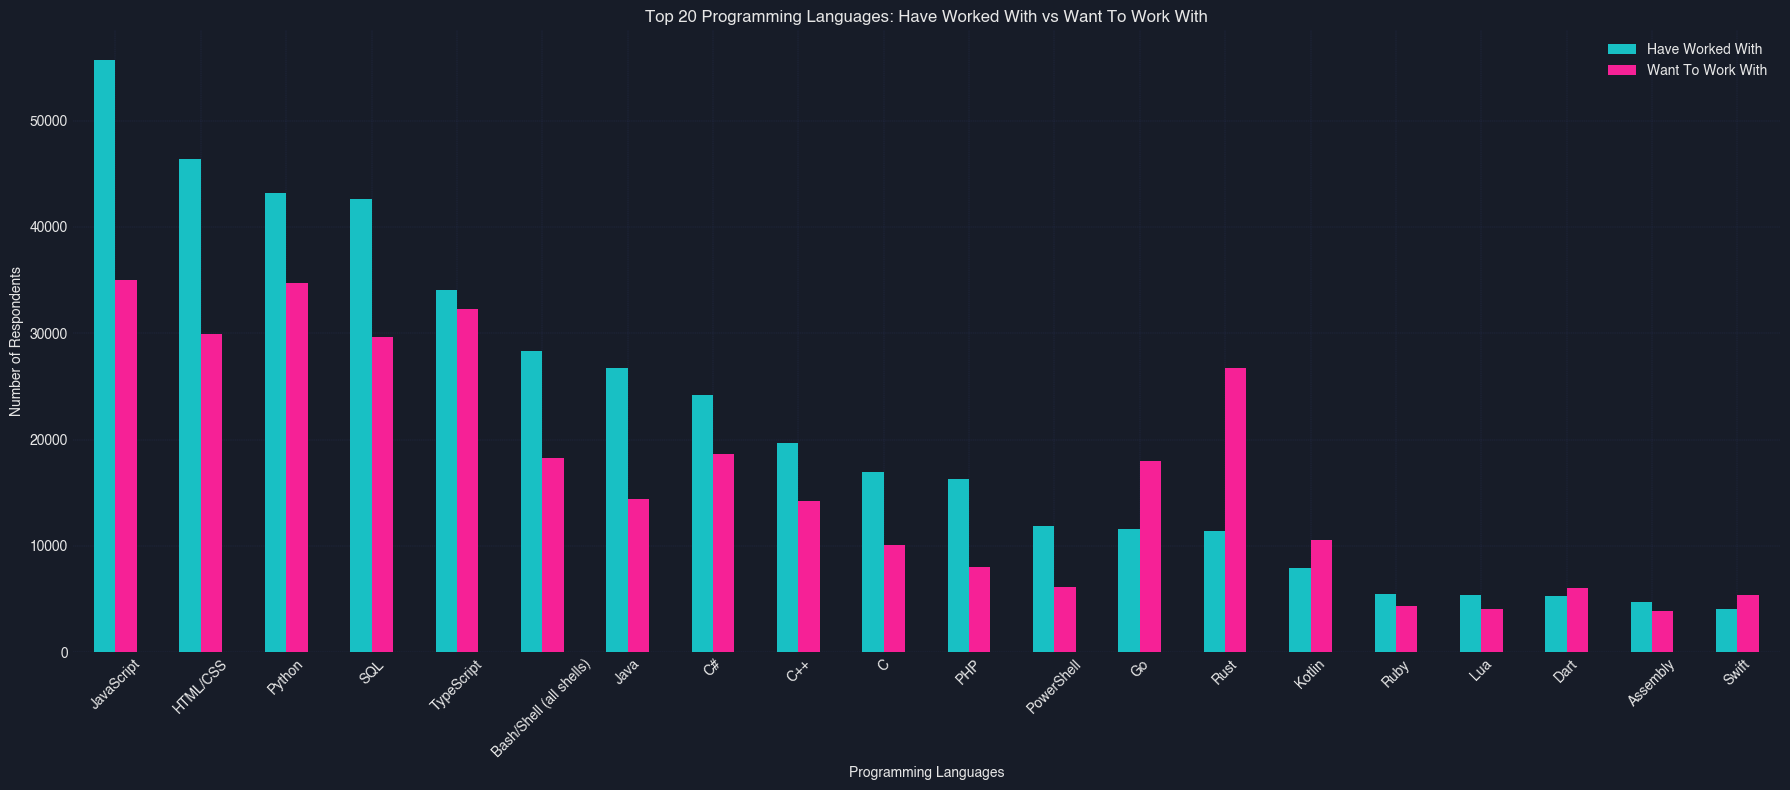

In [8]:
# Checking the specific columns available related to programming languages
language_columns = [col for col in df.columns if "Language" in col]

# Extracting and counting the frequency of each programming language mentioned in both 'HaveWorkedWith' and 'WantToWorkWith'
languages_have_worked = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()
languages_want_to_work = df['LanguageWantToWorkWith'].str.split(';', expand=True).stack().value_counts()

# Combining these counts into a single DataFrame for easier plotting
language_comparison = pd.DataFrame({
    'Have Worked With': languages_have_worked,
    'Want To Work With': languages_want_to_work
}).fillna(0)  # fill missing values

# Filtering to top 15
top_languages = language_comparison.nlargest(20, 'Have Worked With')

# Creating the bar chart
fig, ax = plt.subplots(figsize=(18, 8))
top_languages.plot(kind='bar', ax=ax)
ax.set_title('Top 20 Programming Languages: Have Worked With vs Want To Work With')
ax.set_xlabel('Programming Languages')
ax.set_ylabel('Number of Respondents')
ax.grid(True, which='both', linestyle='--', linewidth=0.25)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### Insights - Programming Language Trends

1. **JavaScript Remains Dominant:** JavaScript continues to be the most widely used programming language, with the highest number of respondents having worked with it. Its versatility in web development likely contributes to its leading position.

2. **High Interest in Python:** Python shows a significant level of interest relative to its current usage. This might be due to its rising popularity in fields like data science, machine learning, and its general ease of use.

3. **Growing Interest in Rust & Go:** Rust displays a considerable gap between the number of people who have worked with it and those who want to work with it, indicating a growing interest in the language. This could be due to its reputation for safety and performance. It seems that there is a steadily growing interest in Go as well.

4. **Decline in Older Languages:** Languages like PHP and C show more people having worked with them compared to those who want to work with them, suggesting a decline in their popularity or a shift in technology trends.

5. **Niche Languages:** Languages like Kotlin, Ruby, Lua, Dart, Assembly, and Swift have fewer users overall but maintain a stable interest from developers, indicating their niche but solid positions in certain sectors or applications.

## Web Development Frameworks

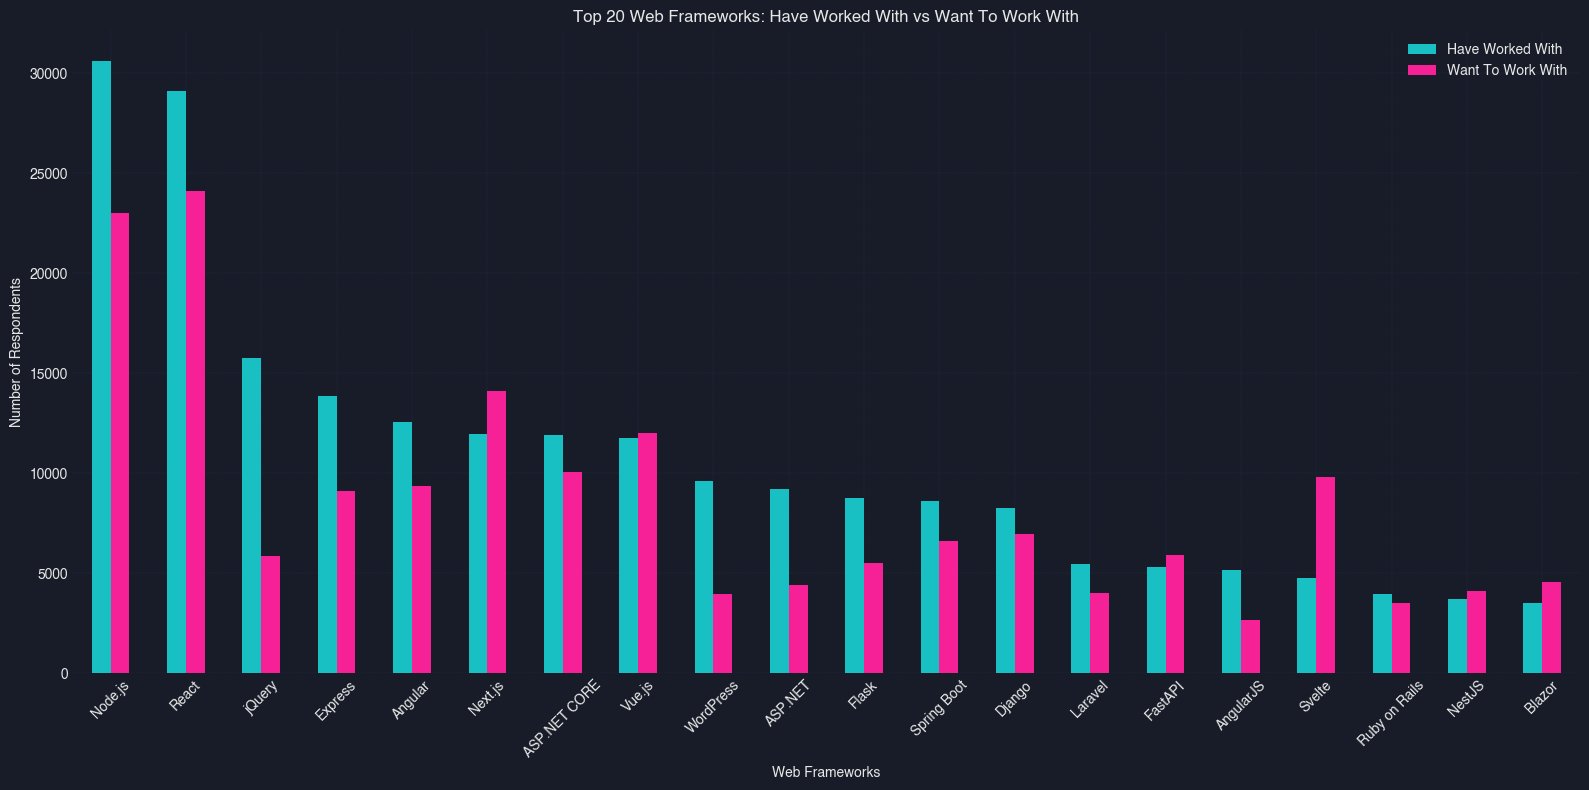

In [9]:
webframe_columns = [col for col in df.columns if "Webframe" in col]

webframe_have_worked = df['WebframeHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()
webframe_want_to_work = df['WebframeWantToWorkWith'].str.split(';', expand=True).stack().value_counts()

webframe_comparison = pd.DataFrame({
    'Have Worked With': webframe_have_worked,
    'Want To Work With': webframe_want_to_work
}).fillna(0)  # fill missing values

# Filtering to top 15
top_web_frameworks = webframe_comparison.nlargest(20, 'Have Worked With')

# Creating the horizontal bar chart
fig, ax = plt.subplots(figsize=(16, 8))
top_web_frameworks.plot(kind='bar', ax=ax)
ax.set_title('Top 20 Web Frameworks: Have Worked With vs Want To Work With')
ax.set_xlabel('Web Frameworks')
ax.set_ylabel('Number of Respondents')
ax.grid(True, which='both', linestyle='--', linewidth=0.25)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### Insights - Web Framework Trends

1. **Node.js and Express are Highly Utilized**: Node.js and Express lead in usage, indicating their prominence in web development, particularly for backend services.

2. **High Interest in Next.js**: There's a significant interest in Next.js relative to its current use, suggesting a strong trend towards server-side rendered applications using React.

3. **Modern Frameworks on the Rise**: Frameworks like Vue.js and Angular maintain a good balance between current use and developer interest, reflecting their solid standing in the development of modern web applications.

4. **Legacy Frameworks Losing Appeal**: Frameworks like jQuery and WordPress show more users having worked with them but less desire to continue using them, pointing to a shift towards more modern, robust, and versatile frameworks.

5. **Emerging Frameworks to Watch**: Svelte and FastAPI show a notable interest despite lower current usage, indicating emerging trends and potential growth areas in web development.

## AI Sentiment Analysis

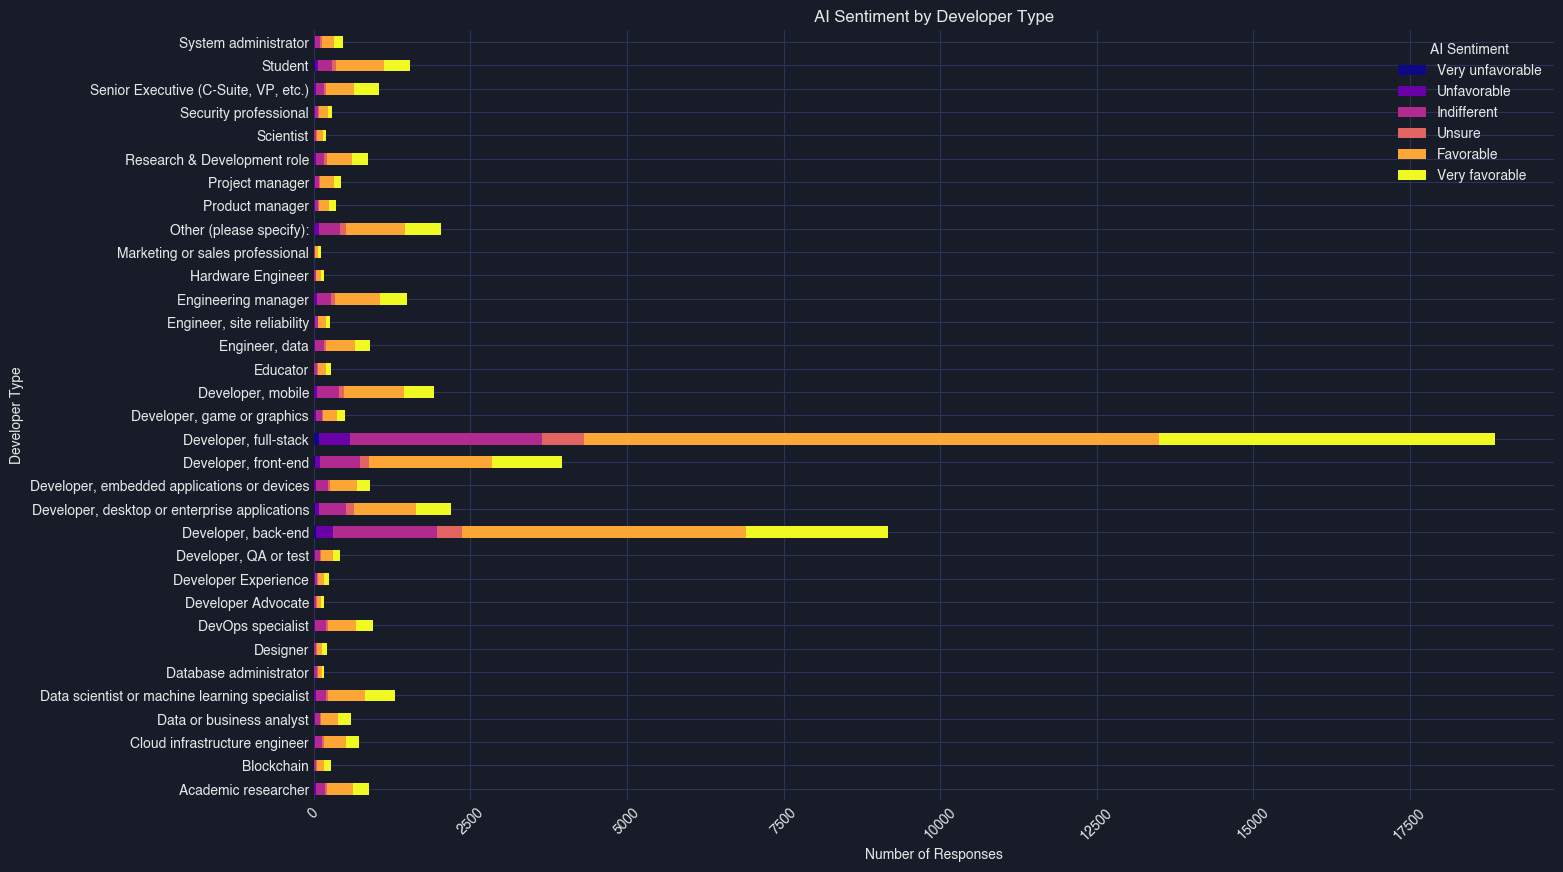

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/raw/stack-overflow-developer-survey-2023/survey_results_public.csv')

# Handle missing values
data_cleaned = data.dropna(subset=['AISent', 'DevType'])

data_expanded = data_cleaned.assign(DevType=data_cleaned['DevType'].str.split(';')).explode('DevType')

# Aggregate data
sentiment_counts = data_expanded.groupby(['DevType', 'AISent']).size().unstack(fill_value=0)

# Reindex dataframe for the order of the sentiment categories
ordered_sentiments = sentiment_counts[['Very unfavorable', 'Unfavorable', 'Indifferent', 'Unsure', 'Favorable', 'Very favorable']]

# Plotting
ordered_sentiments.plot(kind='barh', stacked=True, figsize=(16, 10), colormap='plasma')
plt.title('AI Sentiment by Developer Type')
plt.xlabel('Number of Responses')
plt.ylabel('Developer Type')
plt.legend(title='AI Sentiment')
plt.xticks(rotation=45)
plt.show()

### Insights - AI Sentiment

1. **Overall Sentiment**:
   - **Positive Sentiment Dominance**: For nearly every developer type, the sentiment towards AI is predominantly favorable or very favorable. This suggests a general optimism or positive outlook towards AI across various roles within the technology and developer communities.

2. **Role-Specific Insights**:
   - **High Enthusiasm Among Data Professionals**: Data scientists, machine learning specialists, and data or business analysts show a very high proportion of favorable and very favorable sentiments. This could be indicative of the beneficial impact AI has on fields heavily reliant on data analysis and machine learning.
   - **Cautious Optimism in High-Responsibility Roles**: Roles such as Senior Executives and Engineering Managers show a balanced but cautious sentiment distribution. While still generally positive, these roles exhibit a higher proportion of neutral and unsure sentiments, possibly reflecting the complexities and responsibilities of implementing AI in managerial or executive decisions.

3. **Diverse Responses Among Specialized Roles**:
   - **Mixed Feelings Among Security Professionals and System Administrators**: These roles show a more pronounced spread across indifferent, unsure, and unfavorable sentiments, possibly due to concerns about AI's implications on security and system management.

4. **Development-Focused Roles Are Very Positive**:
   - **Front-End, Full-Stack, and Back-End Developers**: These groups are significantly positive about AI, indicating that AI tools and systems might be integrating well into their workflow or are seen as beneficial in improving development processes.

5. **Educational and Advocacy Perspectives**:
   - **Educators and Developer Advocates**: Display a substantial amount of positive sentiment, which is essential as these roles help shape the perception and adoption of new technologies like AI among learners and the developer community.

6. **Concerns and Indifference**:
   - **Minimal Very Unfavorable Sentiments**: It's noteworthy that very few roles show a significant count of very unfavorable sentiments, suggesting that while there are concerns or indifference, there is not a strong opposition to AI overall.
  
___
